In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [25]:
dataset = pd.read_csv('datasets_596958_1073629_Placement_Data_Full_Class (1).csv')

In [26]:
# Pilih fitur yang digunakan (misalnya: ssc_p, hsc_p, etest_p) dan label (status)
X = dataset[['ssc_p', 'hsc_p', 'etest_p']].values  # Fitur
y = dataset['status'].apply(lambda x: 1 if x == 'Placed' else 0).values  # Konversi label ke bentuk numerik


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 9  8]
 [ 7 30]]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11968\2402221261.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


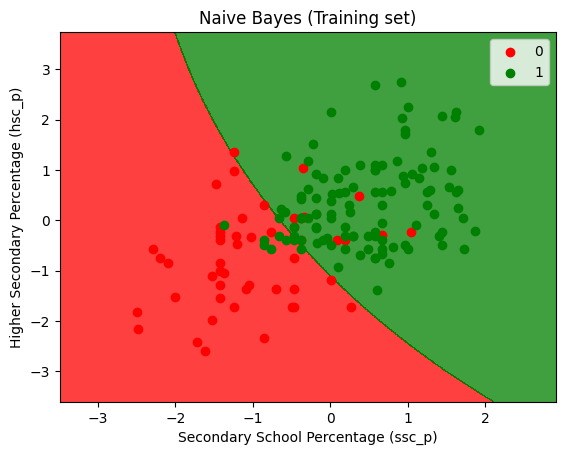

In [32]:
# Visualisasi hasil pada data training (menggunakan dua fitur: ssc_p dan hsc_p)
X_set, y_set = X_train[:, [0, 1]], y_train  # Hanya menggunakan dua fitur: ssc_p dan hsc_p
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(), np.zeros_like(X1.ravel())]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Secondary School Percentage (ssc_p)')
plt.ylabel('Higher Secondary Percentage (hsc_p)')
plt.legend()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11968\2632868272.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


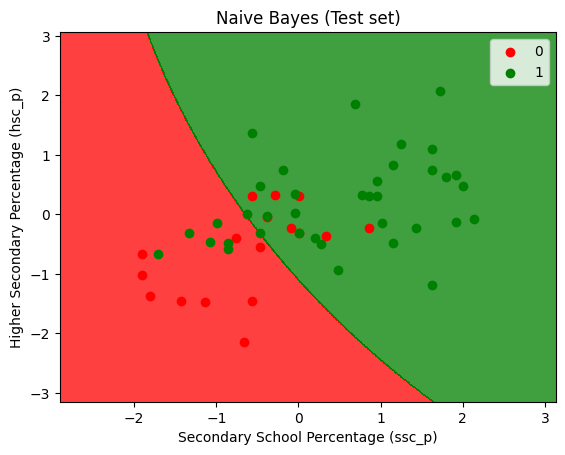

In [33]:
X_set, y_set = X_test[:, [0, 1]], y_test  # Hanya menggunakan dua fitur: ssc_p dan hsc_p
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(), np.zeros_like(X1.ravel())]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Secondary School Percentage (ssc_p)')
plt.ylabel('Higher Secondary Percentage (hsc_p)')
plt.legend()
plt.show()